In [11]:
from sklearn.datasets import fetch_openml

# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)

# The dataset is now in the `mnist` object
X = mnist.data  # Features (28x28 pixel values)
y = mnist.target  # Labels (0-9 digits)

print(X.shape)  # (70000, 784), 70000 images, 28x28 pixels flattened
print(y.shape)  # (70000,), 70000 labels


(70000, 784)
(70000,)


In [12]:
import matplotlib.pyplot as plt

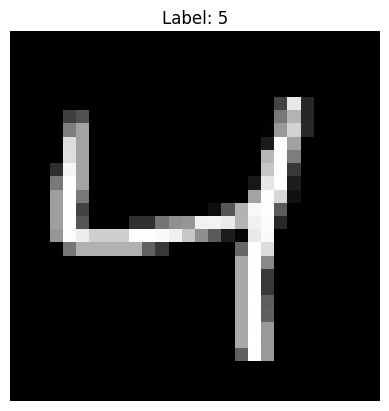

In [13]:
image_data = mnist.data.iloc[2].values  # third image as a 784-length array
image_data = image_data.reshape(28, 28)  # Reshape to 28x28 pixels

# Display the image
plt.imshow(image_data, cmap='gray')
plt.title(f"Label: {mnist.target.iloc[0]}")
plt.axis('off')  # Hide axes
plt.show()

This is the mnist dataset.It consists of hand written digits and thier labels.

Run the classification algorithmns such as LogisticRegression,KNeighborsClassifier, GaussianNB, SVM, Decision Trees, Random forest, KMeans and compare the accuracies of all the classifications models.

You have to import the model from sklearn

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

answer = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    answer[name] = accuracy
    print(f"{name} accuracy: {accuracy}")

# KMeans is a clustering algorithm, not a classifier.
kmeans = KMeans(n_clusters=10, random_state=42)  # 10 clusters for digits 0-9
kmeans.fit(X_train)
kmeans_labels = kmeans.predict(X_test)
kmeans_accuracy = accuracy_score(y_test, kmeans_labels)
answer["KMeans"] = kmeans_accuracy
print(f"\nKMeans inertia: {kmeans.inertia_}")

# Print answer
print("\nClassification Model Accuracies:")
for name, accuracy in answer.items():
    print(f"{name}: {accuracy}")


Training Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.9160714285714285
Training K-Nearest Neighbors...
K-Nearest Neighbors accuracy: 0.9700714285714286
Training Gaussian Naive Bayes...
Gaussian Naive Bayes accuracy: 0.5515714285714286
Training Support Vector Machine...
Support Vector Machine accuracy: 0.9764285714285714
Training Decision Tree...
Decision Tree accuracy: 0.8730714285714286
Training Random Forest...
Random Forest accuracy: 0.9665714285714285

KMeans inertia: 143127516002.95496

Classification Model Accuracies:
Logistic Regression: 0.9160714285714285
K-Nearest Neighbors: 0.9700714285714286
Gaussian Naive Bayes: 0.5515714285714286
Support Vector Machine: 0.9764285714285714
Decision Tree: 0.8730714285714286
Random Forest: 0.9665714285714285
